In [1]:
import os

import numpy as np
import pandas as pd

import torch
from torch.utils.data import DataLoader, Dataset

import matplotlib.pyplot as plt

import albumentations as A


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import sys
sys.path.append("/kaggle/src/")

from data._dataloader import SegDataset
from conf import ExpConfig

/kaggle/working/train_512_512.csv
4556
(512, 512, 3)


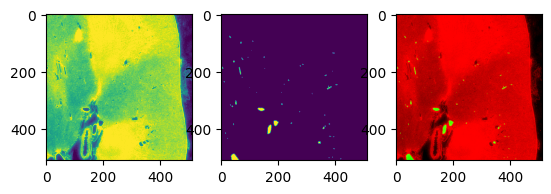

(512, 512, 3)


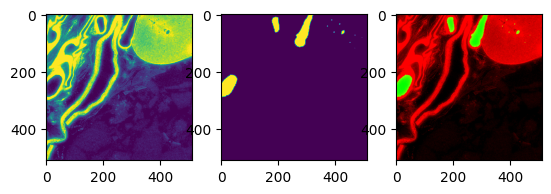

(512, 512, 3)


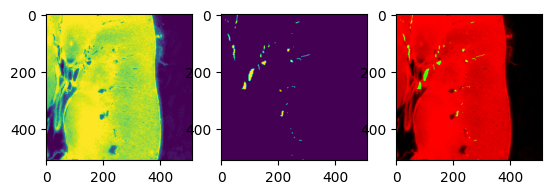

(512, 512, 3)


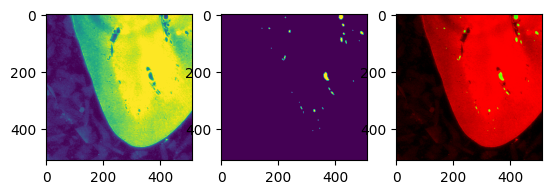

In [3]:
config = ExpConfig()
train_df_path = os.path.join(
    config.output_dir,
    f"{config.phase}_{config.stride_height}_{config.stride_width}.csv",
)
print(train_df_path)
df = pd.read_csv(train_df_path)
df = df[df["data_name"]=="kidney_1_dense"]
print(len(df))
dataset = SegDataset(df, config, phase="train")
dataloader = DataLoader(
    dataset,
    batch_size=4,
    num_workers=config.num_workers,
    shuffle=True,
    pin_memory=True,
)

for idx, (image, mask) in enumerate(dataloader):
    # print(idx)
    if torch.isnan(image).any():
        print("nan")
        print(image)
        raise ValueError
    for batch in range(image.shape[0]):
        image_mask = image[batch].numpy().copy()
        image_mask = (image_mask - image_mask.min()) / (image_mask.max() - image_mask.min())
        image_mask = np.concatenate([
                    np.expand_dims(image_mask[0], axis=-1), 
                    np.expand_dims(mask[batch][0].numpy(), axis=-1),
                    np.zeros_like(np.expand_dims(image_mask[0], axis=-1))
        ], axis=-1)
        # print(image[batch])
        if image[batch] is np.nan:
            print("nan")
            
        if idx == 0:
            print(image_mask.shape)
            plt.figure()
            plt.subplot(1,3,1)
            plt.imshow(image[batch,0,:,:])
            plt.subplot(1,3,2)
            plt.imshow(mask[batch,0,:,:])
            plt.subplot(1,3,3)
            plt.imshow(image_mask)
            plt.show()

   


/kaggle/working/valid_512_512.csv
4556
0
0
torch.Size([1, 512, 512])
torch.Size([1, 512, 512])
tensor([[0.6667, 0.6000, 0.6000,  ..., 0.8333, 0.8333, 0.8667],
        [0.7333, 0.6000, 0.6000,  ..., 0.8667, 0.8333, 0.9000],
        [0.7000, 0.6667, 0.6667,  ..., 0.8667, 0.8667, 0.9333],
        ...,
        [0.1667, 0.1667, 0.2000,  ..., 0.2667, 0.2333, 0.2333],
        [0.2000, 0.2000, 0.2000,  ..., 0.3000, 0.2667, 0.2333],
        [0.1667, 0.2000, 0.2000,  ..., 0.2333, 0.2333, 0.2333]])
(512, 512, 3)


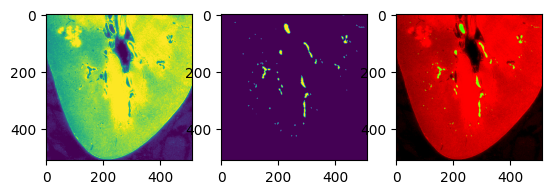

1
torch.Size([1, 512, 512])
torch.Size([1, 512, 512])
tensor([[0.2333, 0.2333, 0.2333,  ..., 1.0333, 1.0000, 0.9667],
        [0.2333, 0.2333, 0.2333,  ..., 1.0333, 1.0000, 0.9667],
        [0.2333, 0.2333, 0.2333,  ..., 1.0333, 1.0000, 0.9667],
        ...,
        [0.2333, 0.2333, 0.2333,  ..., 1.0333, 1.0333, 0.9333],
        [0.2333, 0.2333, 0.2333,  ..., 1.0000, 1.0333, 1.0333],
        [0.2333, 0.2333, 0.2333,  ..., 0.8667, 0.9000, 1.0000]])
(512, 512, 3)


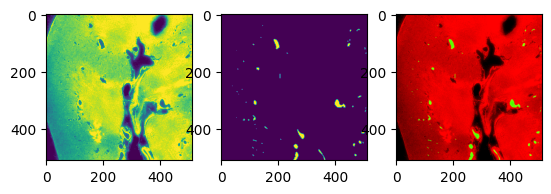

2
torch.Size([1, 512, 512])
torch.Size([1, 512, 512])
tensor([[ 0.8667,  0.5333,  0.5000,  ...,  0.0667,  0.1000,  0.1000],
        [ 0.8667,  0.7667,  0.5333,  ...,  0.1000,  0.1000,  0.1000],
        [ 0.8667,  0.8667,  0.8667,  ...,  0.1000,  0.0667,  0.0667],
        ...,
        [-0.0333, -0.0333,  0.0333,  ...,  0.0667,  0.0667,  0.0333],
        [-0.0333, -0.0333,  0.0333,  ...,  0.0333,  0.0333,  0.0667],
        [ 0.0000, -0.0333,  0.0000,  ...,  0.0333,  0.0333,  0.0333]])
(512, 512, 3)


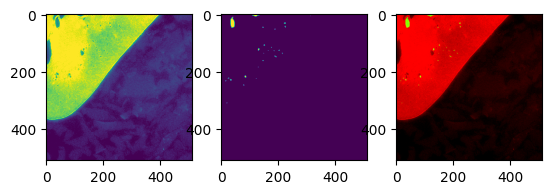

3
torch.Size([1, 512, 512])
torch.Size([1, 512, 512])
tensor([[ 0.8667,  0.8667,  0.8667,  ...,  0.0333,  0.0667,  0.0667],
        [ 0.8667,  0.8667,  0.8667,  ...,  0.1000,  0.0333,  0.0667],
        [ 0.8333,  0.8333,  0.8333,  ...,  0.0667,  0.0667,  0.0333],
        ...,
        [-0.0333, -0.0333, -0.0333,  ..., -0.0333, -0.0333,  0.0333],
        [-0.0333, -0.0333,  0.0000,  ..., -0.0333, -0.0333,  0.0333],
        [ 0.0000, -0.0333, -0.0333,  ..., -0.0333,  0.0000,  0.0000]])
(512, 512, 3)


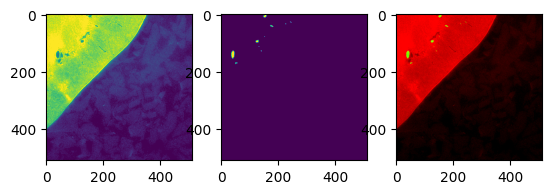

In [4]:
train_df_path = os.path.join(
    config.output_dir,
    f"valid_{config.stride_height}_{config.stride_width}.csv",
)
print(train_df_path)
df = pd.read_csv(train_df_path)
df = df[df["data_name"]=="kidney_1_dense"]
print(len(df))

dataset = SegDataset(df, config, phase="valid")
dataloader = DataLoader(
    dataset,
    batch_size=4,
    num_workers=config.num_workers,
    shuffle=True,
    pin_memory=True,
)

for idx, (image, mask) in enumerate(dataloader):
    print(idx)
    for batch in range(image.shape[0]):
        print(batch)
        print(image[batch].shape)
        print(mask[batch].shape)
        image_mask = image[batch].numpy().copy()
        image_mask = (image_mask - image_mask.min()) / (image_mask.max() - image_mask.min())
        image_mask = np.concatenate([
                    np.expand_dims(image_mask[0], axis=-1), 
                    np.expand_dims(mask[batch][0].numpy(), axis=-1),
                    np.zeros_like(np.expand_dims(image_mask[0], axis=-1))
        ], axis=-1)
        print(image[batch,0])
        print(image_mask.shape)
        plt.figure()
        plt.subplot(1,3,1)
        plt.imshow(image[batch,0,:,:])
        plt.subplot(1,3,2)
        plt.imshow(mask[batch,0,:,:])
        plt.subplot(1,3,3)
        plt.imshow(image_mask)
        plt.show()

    break

